### Different Types of Missing Data
    1.MCAR
    2.MAR
    3.MNAR

1. **Missing Completely at Random (MCAR):**
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.shape

(891, 12)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Here Age and Cabin missing values are not of type MACR but 2 missing values in Embarked column are of MCAR type.

**2. Missing Data Not At Random(MNAR):** Systematic missing values. There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

The Age and Cabin column missing values comes under MNAR type

In [14]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

df['cabin_null'].mean() #percentage of missing values

0.7710437710437711

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [17]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

1 means survived and 0 means not survived. Therefore 60% of the survived people and for 87% of people who didn't survived we have missing values in Cabin column

**3. Missing at Random:** It means  the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
For example in a survey, men hiding their salary or women hiding their age.

### Different Techniques to Handle Missing Data
    1.Mean/ Median/Mode replacement
    2.Random Sample Imputation
    3.Capturing NAN values with a new feature
    4.End of Distribution imputation
    5.Arbitrary imputation
    6.Frequent categories imputation

**1. Mean/ Median/Mode replacement:** Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset 

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

In [21]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [23]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [24]:
median=df.Age.median()
median

28.0

In [25]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [29]:
print(df.Age.std())
print(df.Age_median.std())

14.526497332334042
13.019696550973201


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

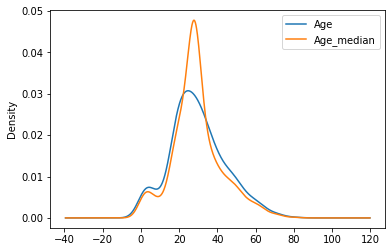

In [49]:
df[['Age', 'Age_median']].plot(kind='kde')